Syntax natürlicher Sprachen, WS 2023/24

# 12 - Übung

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
from nltk import conlltags2tree

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.23.2/lib/python3.12/site-packages/gpg-1.23.2-py3.12-macosx-14-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached svgling-0.4.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached svgwrite-1.4.3-py3-none-any.whl (67 kB)
Using cached svgling-0.4.0-py3-none-any.whl (23 kB)


## Aufgabe 1 - IOB-Tagging

### a) Vervollständigen Sie den die folgende *IOB-Tag-Sequenz* einer NP-VP-Chunk-Analyse erfüllenden deutschen Satz.

#### (Beachten Sie auch die gegebenen Satzzeichen bzgl. möglicher Satztypen und entsprechender Worstellung.)


In [ ]:
iob_list = [
("B-NP", ""),
("B-VP", ""),
("O", ""),
("O", ","),
("O", ""),
("B-NP", ""),
("B-NP", ""),
("I-NP", ""),
("O", ""),
("B-VP", ""),
("O", ".")
]

tree = conlltags2tree([(word, "", iobtag)for iobtag, word in iob_list])
tree.pretty_print(unicodelines=True)

### b) Geben Sie die *IOB-Tag-Sequenz* und *POS-Label* einer vollständigen flachen Chunk-Analyse für den folgenden Satz an:

- *Während sich Kafka in Briefen, Tagebüchern und Prosatexten umfangreich mit seinem Verhältnis zum Vater auseinandersetzte, stand die Beziehung zu seiner Mutter eher im Hintergrund.*

In [3]:
iob_list = [
("ein", "DET", "B-NP"),
("Beispiel", "N", "I-NP"),
]

tree = conlltags2tree(iob_list)
tree.pretty_print(unicodelines=True)

         S            
         │             
         NP           
   ┌─────┴──────┐      
ein/DET     Beispiel/N



In [ ]:
iob_list = [
("Während", "", ""),
("sich", "", "B-NP"),
("Kafka", "", "B-NP"),
("in", "", ""),
("Briefen,", "", "B-NP"),
("Tagebüchern", "", "B-NP"),
("und", "", ""),
("Prosatexten", "", "B-NP"),
("umfangreich", "", ""),
("mit", "", ""),
("seinem", "", ""),
("schwierigen", "", ""),
("Verhältnis", "", ""),
("zum", "", ""),
("Vater", "", ""),
("auseinandersetzte", "", ""),
(",", "PUNCT", "O"),
("stand", "", ""),
("die", "", ""),
("Beziehung", "", ""),
("zu", "", ""),
("seiner", "", ""),
("Mutter", "", ""),
("eher", "", ""),
("im", "", ""),
("Hintergrund", "", ""),
(".", "PUNCT", "O")
]

tree = conlltags2tree(iob_list)
tree.pretty_print(unicodelines=True)

## *Aufgabe 2 - Evaluationsmetriken*

#### Betrachten Sie folgende Daten. Es handelt sich um ein vereinfachtes Tagging-Schema fürs Chunking, bei dem nur zwischen „Teil einer NP“ (`1`) und „nicht Teil einer NP“ (`0`) unterschieden wird.

In [5]:
ground_truth = [1,0,1,0,0,1,1,1,1,0]
chunker1     = [1,1,1,0,1,0,1,1,1,1]
chunker2     = [1,0,1,0,0,0,0,0,1,0]
chunker3     = [0,0,0,0,0,1,1,1,1,0]

#### Berechnen Sie für jeden der Chunker Accuracy, Precision, Recall und F1-Score zunächst per Hand und überprüfen Sie dann Ihr Ergebnis mit dem folgenden Code.

In [6]:
def accuracy(chunker):
    print(
        "Accuracy:",
        "{:.2f}".format(accuracy_score(ground_truth, chunker))
    )
    print(
        "Precision:",
        "{:.2f}".format(precision_score(ground_truth, chunker))
    )
    print(
        "Recall:",
        "{:.2f}".format(recall_score(ground_truth, chunker))
    )
    print(
        "F1-Score:",
        "{:.2f}".format(f1_score(ground_truth, chunker))
    )

In [9]:
# chunker 1

#Accuracy: 6/10 = 0,6
#Precision: 5/8 = 0,63
#Recall: 5/6 = 0,83
#F1: (2*0,63*0,83)/(0,63+0,83)=0,72

In [10]:
accuracy(chunker1)

Accuracy: 0.60
Precision: 0.62
Recall: 0.83
F1-Score: 0.71


In [11]:
# chunker 2

#Accuracy: 7/10=0,7
#Precision: 3/3=1
#Recall: 3/6=0,5
#F1: 1/1,5=0,67

In [12]:
accuracy(chunker2)

Accuracy: 0.70
Precision: 1.00
Recall: 0.50
F1-Score: 0.67


In [15]:
# chunker 3

#Accuracy: 0,8
#Precision: 4/4=1
#Recall: 4/6= 0,67
#F1: (2*0,67)/1,67=0,80

In [16]:
accuracy(chunker3)

Accuracy: 0.80
Precision: 1.00
Recall: 0.67
F1-Score: 0.80


## *Aufgabe 3 - Herunterladen von Ressourcen*

#### Das CoNLL 2000 Korpus ist ein POS- und Chunk-getaggtes Korpus (IOB- Format), das in ein Test- und ein Trainingskorpus aufgeteilt ist. Wir werden es zum Training und zur Evaluation von Chunk-Parsern verwenden. Laden Sie es sich dafür zunächst über die Ressource `corpora/conll2000` herunter.

In [17]:
# nltk.download()

#### Wenn Sie es erfolgreich heruntergeladen haben, können Sie folgendermaßen darauf zugreifen:

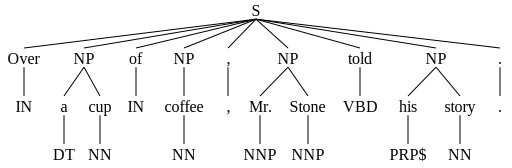

In [20]:
from nltk.corpus import conll2000
conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99]

#### Das `chunk_types`-Argument dient der Auwahl von Chunk-Typen (in diesem Beispiel Nominalphrasen).

## *Aufgabe 4 - Chunking mit regulären Ausdrücken*

#### Erstellen Sie einen einfachen `RegexpParser`, der für Nominalphrasen charakteristische Tags zu NPs zusammenfasst. Solche charakteristischen Tags sind z.B. Kardinalzahlen (`CD`), Artikel (`DT`), Adjektive (`JJ`, `JJR`, `JJS`) und natürlich Substantive (`NN`, `NNS`, `NNP`, `NNPS`).

#### Weitere interessante Tags wären `PDT` (z.B. *both*, *a lot of*), `POS` (*'s*), `PRP` (Personalpronomen), `PRP$`(Possessivpronomen).

In [8]:
regex = r"""NP:
{<>}
"""

#### Evaluieren Sie Ihren Parser anschließend auf dem CoNLL 2000 Korpus:

In [23]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
cp = nltk.RegexpParser(regex)
print(cp.accuracy(test_sents))

NameError: name 'regex' is not defined

## *Aufgabe 5 - Datenbasiertes Chunking*

### a) Betrachten Sie den folgenden Code für einen Chunker, der für jedes POS-Tag das wahrscheinlichste Chunk-Tag berechnet (Training) und dieses dann zur Testzeit ausgibt.


In [24]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [
            [
                (t,c)
                for w,t,c in nltk.chunk.tree2conlltags(sent)
            ]
            for sent in train_sents
        ]
        self.tagger = nltk.UnigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [
            chunktag for (pos, chunktag) in tagged_pos_tags
        ]
        conlltags = [
            (word, pos, chunktag)
            for ((word, pos), chunktag)
            in zip(sentence, chunktags)
        ]
        return nltk.chunk.conlltags2tree(conlltags)

#### Trainieren und evaluieren Sie den UnigramChunker auf dem CoNLL 2000 Korpus für NPs.

In [25]:
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
uc = UnigramChunker(train_sents)
print(uc.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


#### Um uns einen Überblick darüber zu verschaffen, was der Chunker gelernt hat, können wir ihn für jedes mögliche POS-Tag eine Vorhersage treffen lassen:

In [26]:
postags = sorted(set(pos for sent in train_sents for (word,pos) in sent.leaves()))
uc.tagger.tag(postags)

[('#', 'B-NP'),
 ('$', 'B-NP'),
 ("''", 'O'),
 ('(', 'O'),
 (')', 'O'),
 (',', 'O'),
 ('.', 'O'),
 (':', 'O'),
 ('CC', 'O'),
 ('CD', 'I-NP'),
 ('DT', 'B-NP'),
 ('EX', 'B-NP'),
 ('FW', 'I-NP'),
 ('IN', 'O'),
 ('JJ', 'I-NP'),
 ('JJR', 'B-NP'),
 ('JJS', 'I-NP'),
 ('MD', 'O'),
 ('NN', 'I-NP'),
 ('NNP', 'I-NP'),
 ('NNPS', 'I-NP'),
 ('NNS', 'I-NP'),
 ('PDT', 'B-NP'),
 ('POS', 'B-NP'),
 ('PRP', 'B-NP'),
 ('PRP$', 'B-NP'),
 ('RB', 'O'),
 ('RBR', 'O'),
 ('RBS', 'B-NP'),
 ('RP', 'O'),
 ('SYM', 'O'),
 ('TO', 'O'),
 ('UH', 'O'),
 ('VB', 'O'),
 ('VBD', 'O'),
 ('VBG', 'O'),
 ('VBN', 'O'),
 ('VBP', 'O'),
 ('VBZ', 'O'),
 ('WDT', 'B-NP'),
 ('WP', 'B-NP'),
 ('WP$', 'B-NP'),
 ('WRB', 'O'),
 ('``', 'O')]

### b) der `ConsecutiveNPChunker`, dessen Code Sie in der nächsten Zelle sehen, basiert auf einem Klassifikator:

In [27]:
class ConsecutiveNPChunkTagger(nltk.TaggerI):

    def __init__(self, train_sents, npchunk_features):
        self.extract_features = npchunk_features
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = self.extract_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

class ConsecutiveNPChunker(nltk.ChunkParserI):
    def __init__(self, train_sents, npchunk_features):
        tagged_sents = [[((w,t),c) for (w,t,c) in
                         nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents, npchunk_features)

    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

#### Dies erlaubt uns, die Features, die für die Klassifikation extrahiert werden, genauer zu bestimmen.

#### Ein Feature-Extraktor lässt sich als Funktion z.B. so definieren:

In [28]:
def pos_feature(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

#### Dieser Feature-Extraktor extrahiert genau ein Feature, nämlich das POS-Tag, das auch der UnigramChunker verwendet hat.

#### Evaluieren Sie den `ConsecutiveNPChunker` mit diesem Feature-Extraktor und vergleichen Sie seine Performanz mit der des `UnigramChunker`s.

In [29]:
chunker = ConsecutiveNPChunker(train_sents, pos_feature)
print(chunker.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


### c) Fügen Sie weitere Features für:
- das aktuelle Wort
- das vorhergehende POS-Tag
- das vorhergehende Chunk-Tag

#### zur Extraktion hinzu und beobachten Sie jeweils die Auswirkungen auf die Performanz in der Evaluation.

In [17]:
def word_feature(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

def previous_pos(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

def previous_chunk(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

In [ ]:
chunker = ConsecutiveNPChunker(train_sents, word_feature)
print(chunker.accuracy(test_sents))

In [ ]:
chunker = ConsecutiveNPChunker(train_sents, previous_pos)
print(chunker.accuracy(test_sents))

In [ ]:
chunker = ConsecutiveNPChunker(train_sents, previous_chunk)
print(chunker.accuracy(test_sents))